<a href="https://colab.research.google.com/github/mar-valeria/Aprendizaje-automatico/blob/main/Agrupamiento%20Jer%C3%A1rquico/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [119]:
# Paquetes necesarios
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para visualización
import numpy as np # Para manejo de arreglos
import plotly.express as px # Para visualización
from scipy.spatial.distance import cdist # Para cálculo de distancias
from scipy.spatial.distance import pdist
# Modelo de clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Estandarización de datos
from sklearn.preprocessing import StandardScaler
# Para PCA
from sklearn.decomposition import PCA
# Para método de silueta
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, fcluster

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [110]:
# Leer los datos
url = "https://raw.githubusercontent.com/mar-valeria/Aprendizaje-automatico/refs/heads/main/Add_dataset%20_mental_health"
data = pd.read_csv(url, sep=';')
# Tomo las columnas de interés
numeric_cols = ['stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score','anxiety_score', 'social_support_score','productivity_score']
data = data[numeric_cols]
display(data.head())

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
0,6,6.2,3,28,17,54,59.7
1,10,9.0,4,30,11,85,54.9
2,7,7.7,2,24,7,62,61.3
3,4,4.5,4,6,0,95,97.0
4,3,5.4,0,24,12,70,69.0


In [111]:
# Descripción de los datos
data.describe()

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [112]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:])

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

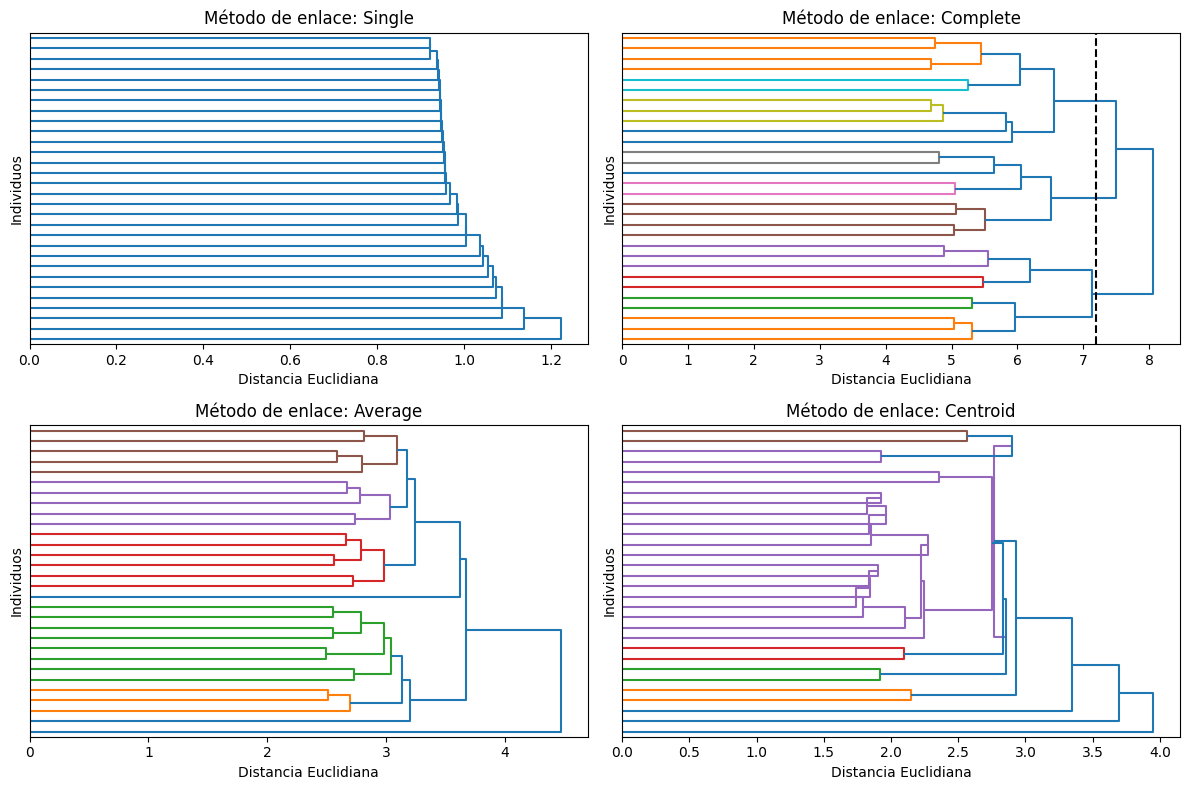

In [113]:
methods = ['single', 'complete', 'average', 'centroid']
distancia_corte = 7.2

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, method in enumerate(methods):
    Z = linkage(X, method=method)

    dendrogram(
        Z,
        orientation='right',
        ax=axes[i],
        no_labels=True,
        truncate_mode='lastp',
        p=30
    )

    axes[i].axvline(x=distancia_corte, color='k', linestyle='--')
    axes[i].set_title(f"Método de enlace: {method.capitalize()}")
    axes[i].set_xlabel("Distancia Euclidiana")
    axes[i].set_ylabel("Individuos")

plt.tight_layout()
plt.show()


Se utilizó la distancia euclidiana debido a que las variables son numéricas y permiten medir de forma directa la similitud entre individuos. Se generó los gráficos por los cuatro métodos de enlace y se observa que el método de enlace completo genera clústeres más compactos y permite identificar con mayor claridad una distancia de corte, facilitando la interpretación de los grupos obtenidos.

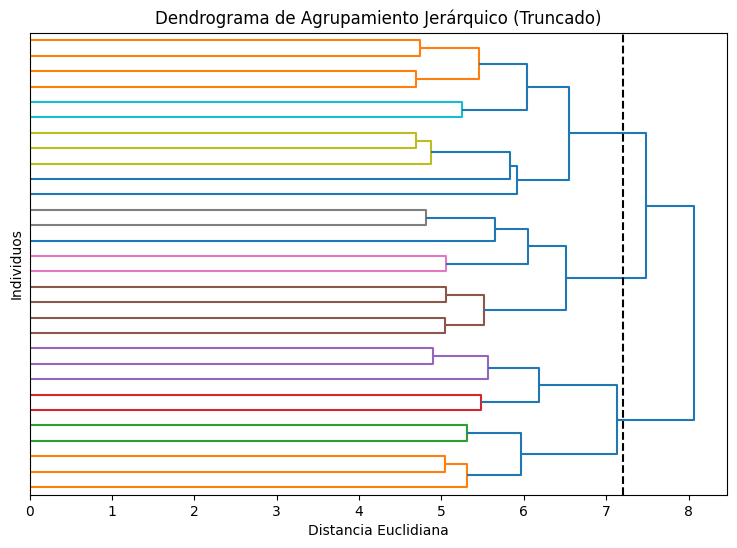

In [114]:
# Realizamos el clustering jerárquico
Z = linkage(X, method='complete')

distancia_corte = 7.2
plt.figure(figsize=(9, 6))
dendrogram(
    Z,
    orientation='right',
    truncate_mode='lastp',
    p=30,
    no_labels=True
)
plt.axvline(x=distancia_corte, color='k', linestyle='--')
plt.title("Dendrograma de Agrupamiento Jerárquico (Truncado)")
plt.xlabel("Distancia Euclidiana")
plt.ylabel("Individuos")
plt.show()


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [115]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(data.head())

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
0,6,6.2,3,28,17,54,59.7,C1
1,10,9.0,4,30,11,85,54.9,C1
2,7,7.7,2,24,7,62,61.3,C1
3,4,4.5,4,6,0,95,97.0,C2
4,3,5.4,0,24,12,70,69.0,C1


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [116]:
# Resumen por clúster
data['Cluster'].value_counts()

data.groupby('Cluster')[numeric_cols].mean()

for cluster in sorted(data['Cluster'].unique()):
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

# Varianza explicada
var_exp = pca.explained_variance_ratio_
print(f"Varianza explicada PC1: {var_exp[0]*100:.2f}%")
print(f"Varianza explicada PC2: {var_exp[1]*100:.2f}%")
print(f"Varianza total (PC1+PC2): {(var_exp[0]+var_exp[1])*100:.2f}%")

Cluster C1: cantidad de elementos 3695


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
0,6,6.2,3,28,17,54,59.7,C1
1,10,9.0,4,30,11,85,54.9,C1
2,7,7.7,2,24,7,62,61.3,C1
4,3,5.4,0,24,12,70,69.0,C1
6,2,5.5,1,25,3,87,63.1,C1


Cluster C2: cantidad de elementos 2884


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
3,4,4.5,4,6,0,95,97.0,C2
9,8,3.1,0,7,18,88,93.2,C2
18,9,8.2,5,3,14,99,84.8,C2
19,8,7.3,6,2,8,68,98.6,C2
20,9,5.6,2,12,8,22,81.4,C2


Cluster C3: cantidad de elementos 3421


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,Cluster
5,3,9.9,3,17,9,63,69.3,C3
11,10,4.4,7,13,2,23,80.1,C3
12,10,6.5,1,15,17,43,79.6,C3
13,5,5.1,6,5,7,6,93.0,C3
16,2,8.7,2,14,6,64,85.8,C3


Varianza explicada PC1: 32.33%
Varianza explicada PC2: 17.02%
Varianza total (PC1+PC2): 49.35%


In [117]:
# DataFrame para graficar
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = data['Cluster'].values

# Si tienes una columna identificadora, úsala; si no, crea un ID simple
if 'Name' in data.columns:
    df_pca['Name'] = data['Name'].values
    hover_cols = ['Name']
else:
    df_pca['ID'] = ['Ind_' + str(i) for i in range(len(data))]
    hover_cols = ['ID']

# Scatterplot 2D
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=hover_cols,
    title='Clústeres visualizados en 2D (PCA)'
)

fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(width=900, height=600)
fig.show()


Los clústeres obtenidos muestran una separación moderada en el gráfico 2D. Esto se debe a la reducción de dimensionalidad con PCA, que explica solo el 49.35% de la varianza. Aunque los grupos se solapan visualmente, el clustering sigue siendo válido en el espacio original de las variables.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [118]:
# Obtener las etiquetas de clúster (definir corte con fcluster)
labels = fcluster(Z, t=distancia_corte, criterion='distance')

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Coeficiente de Silueta: {silhouette_avg:.3f}')

Coeficiente de Silueta: 0.107


El coeficiente de silueta obtenido es 0.107, lo que indica una separación moderada entre los clústeres. Esto sugiere que los grupos no están perfectamente definidos, pero muestran una separación suficiente para ser considerados como clústeres válidos.

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

In [120]:
# Métodos de enlace a evaluar
methods = ['single', 'complete', 'average', 'centroid']

# Distancias de corte a probar (ajústalas si quieres)
cortes = [3, 4, 6.5, 8.2]

resultados = []

for method in methods:
    # Clustering jerárquico
    Z = linkage(X_scaled, method=method)

    for corte in cortes:
        # Etiquetas de clúster
        labels = fcluster(Z, t=corte, criterion='distance')

        # Evitar casos con 1 solo clúster
        if len(set(labels)) > 1:
            sil = silhouette_score(X_scaled, labels)

            resultados.append({
                'Metodo': method,
                'Distancia_corte': corte,
                'Num_clusters': len(set(labels)),
                'Silueta': sil
            })

# Convertir a DataFrame y ordenar
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='Silueta', ascending=False)

display(df_resultados)

,Metodo,Distancia_corte,Num_clusters,Silueta
4,average,4.0,2,0.221020
2,complete,6.5,6,0.051118
0,complete,3.0,162,0.049941
3,average,3.0,11,0.043645
1,complete,4.0,57,0.041201
5,centroid,3.0,4,0.030982


El mejor caso podríamos identificarlo como Average + corte 4.0 - silueta = 0.22 (2 clústeres)